# Concrete Strength Prediction

In [1]:
#Import necessary libraries
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")  # Not always recommended, but jsut so our notebook looks clean for this activity

#Importing Sciket learn libraries

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.utils import resample

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score


from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Importing libraries from SciPy

from scipy import stats
from scipy.stats import zscore

In [2]:
df = pd.read_csv("concrete.csv")  # Read the data regarding customer attributes


In [3]:
print(df.shape)

(1030, 9)


In [4]:
df.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29


In [5]:
df.tail()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28,13.29
1026,531.3,0.0,0.0,141.8,28.2,852.1,893.7,3,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,270,55.06
1029,540.0,0.0,0.0,173.0,0.0,1125.0,613.0,7,52.61


In [6]:
df.info() #checking the info of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [7]:
df.describe().T  #dataframe describe

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## No. of Unique Values

In [8]:
df.nunique() #unique values

cement          278
slag            185
ash             156
water           195
superplastic    111
coarseagg       284
fineagg         302
age              14
strength        845
dtype: int64

## Value Counts

In [9]:
df['cement'].value_counts()

425.0    20
362.6    20
251.4    15
446.0    14
310.0    14
         ..
312.9     1
261.9     1
325.6     1
143.8     1
145.4     1
Name: cement, Length: 278, dtype: int64

In [10]:
df['slag'].value_counts()

0.0      471
189.0     30
106.3     20
24.0      14
20.0      12
        ... 
161.0      1
160.5      1
129.0      1
100.6      1
209.0      1
Name: slag, Length: 185, dtype: int64

In [11]:
df['ash'].value_counts()

0.0      566
118.3     20
141.0     16
24.5      15
79.0      14
        ... 
119.0      1
134.0      1
95.0       1
130.0      1
129.7      1
Name: ash, Length: 156, dtype: int64

In [12]:
df['water'].value_counts()

192.0    118
228.0     54
185.7     46
203.5     36
186.0     28
        ... 
165.0      1
237.0      1
166.7      1
191.3      1
184.4      1
Name: water, Length: 195, dtype: int64

In [13]:
df['superplastic'].value_counts()

0.0     379
11.6     37
8.0      27
7.0      19
6.0      17
       ... 
2.2       1
11.5      1
6.3       1
10.5      1
9.8       1
Name: superplastic, Length: 111, dtype: int64

In [14]:
df['coarseagg'].value_counts()

932.0     57
852.1     45
944.7     30
968.0     29
1125.0    24
          ..
909.7      1
925.3      1
845.0      1
868.6      1
923.2      1
Name: coarseagg, Length: 284, dtype: int64

In [15]:
df['fineagg'].value_counts()

594.0    30
755.8    30
670.0    23
613.0    22
801.0    16
         ..
792.5     1
762.9     1
674.8     1
658.0     1
762.2     1
Name: fineagg, Length: 302, dtype: int64

In [16]:
df['age'].value_counts()

28     425
3      134
7      126
56      91
14      62
90      54
100     52
180     26
91      22
365     14
270     13
360      6
120      3
1        2
Name: age, dtype: int64

In [17]:
df['strength'].value_counts()

33.40    6
79.30    4
41.05    4
71.30    4
35.30    4
        ..
61.23    1
26.31    1
38.63    1
47.74    1
15.75    1
Name: strength, Length: 845, dtype: int64

## Null Values

In [18]:
df.isna().sum()

cement          0
slag            0
ash             0
water           0
superplastic    0
coarseagg       0
fineagg         0
age             0
strength        0
dtype: int64

In [19]:
df.isnull().sum().sum() #Total Number of missing values in  dataframe

0

## Duplicates

In [20]:
##Identify duplicates records in the data
dupes = df.duplicated()
sum(dupes)

25

In [21]:
df =df.drop_duplicates()

In [22]:
dupes = df.duplicated()
sum(dupes)

0

In [23]:
print(df.shape)

(1005, 9)


## Dealing with Outliers using IQR

In [24]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

cement          158.30
slag            142.50
ash             118.30
water            26.30
superplastic     10.00
coarseagg        99.00
fineagg          97.90
age              49.00
strength         21.35
dtype: float64


In [25]:
np.where((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

(array([  33,   44,   51,   64,   66,   93,   99,  103,  129,  129,  133,
         144,  149,  152,  156,  157,  159,  190,  192,  198,  199,  207,
         232,  245,  256,  257,  262,  263,  270,  291,  296,  300,  310,
         311,  321,  357,  359,  368,  391,  428,  443,  443,  444,  458,
         460,  477,  496,  496,  498,  527,  528,  559,  568,  571,  571,
         574,  581,  588,  606,  608,  609,  618,  628,  682,  699,  706,
         707,  718,  724,  728,  738,  739,  759,  772,  799,  809,  820,
         832,  839,  839,  843,  860,  879,  880,  893,  897,  898,  927,
         928,  932,  934,  947,  961,  966,  970,  978,  992, 1001, 1003],
       dtype=int64),
 array([3, 4, 7, 7, 3, 7, 7, 7, 3, 6, 7, 7, 7, 7, 4, 7, 7, 8, 8, 7, 7, 7,
        4, 8, 7, 8, 7, 3, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7, 3, 3, 6, 7, 3,
        7, 7, 3, 6, 8, 4, 7, 7, 7, 3, 6, 3, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
        7, 8, 3, 4, 7, 7, 7, 3, 4, 3, 4, 7, 3, 6, 7, 7, 7, 7, 3, 1, 7, 8,
        7, 4, 7,

In [26]:
df_out = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)] # rows without outliers
df_out.shape

(911, 9)

In [27]:
df1 = df.copy()

In [28]:
# Replace every outlier on the lower side by the lower whisker
for i, j in zip(np.where(df1 < Q1 - 1.5 * IQR)[0], np.where(df1 < Q1 - 1.5 * IQR)[1]): 
    
    whisker  = Q1 - 1.5 * IQR
    df1.iloc[i,j] = whisker[j]

    
#Replace every outlier on the upper side by the upper whisker    
for i, j in zip(np.where(df1 > Q3 + 1.5 * IQR)[0], np.where(df1 > Q3 + 1.5 * IQR)[1]):
    
    whisker  = Q3 + 1.5 * IQR
    df1.iloc[i,j] = whisker[j]

In [29]:
df1.shape, df.shape

((1005, 9), (1005, 9))

In [30]:
df1 = pd.DataFrame(df1)

In [31]:
df1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29
...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29
1026,531.3,0.0,0.0,141.8,25.0,852.1,893.7,3.0,41.30
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,129.5,55.06


## Univariate

<AxesSubplot:xlabel='strength', ylabel='Density'>

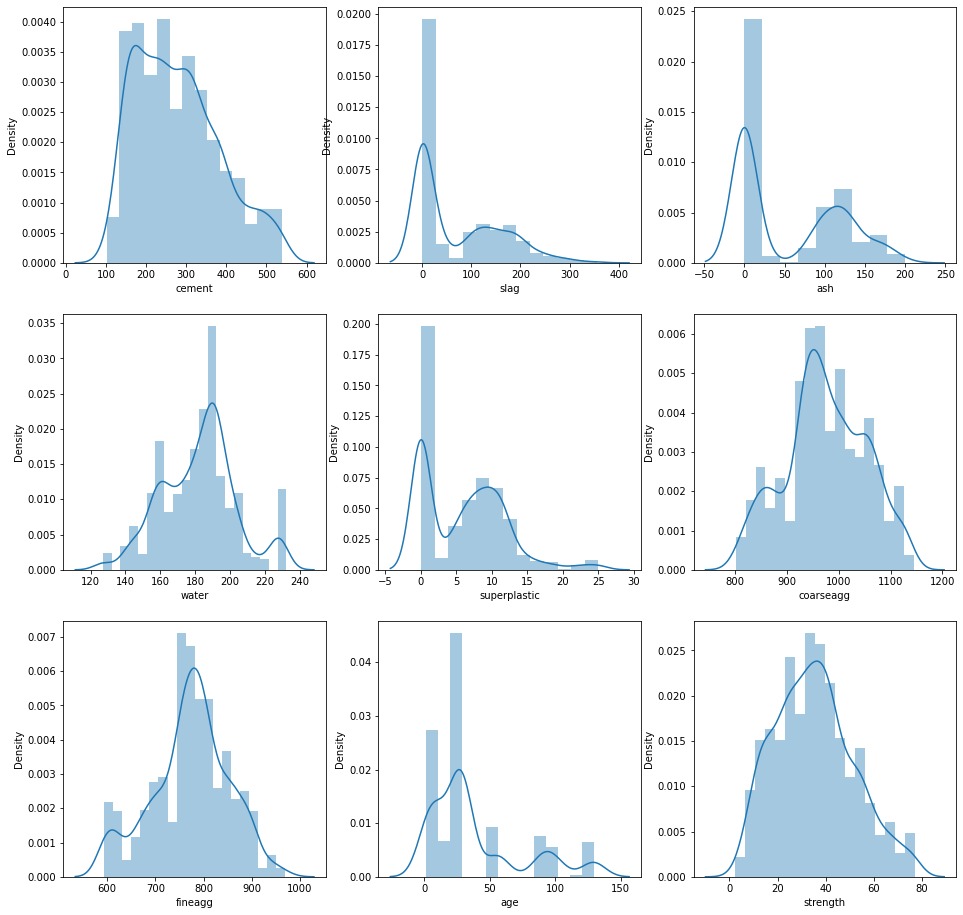

In [32]:
# Distplot

fig, ax2 = plt.subplots(3, 3, figsize=(16, 16))
sns.distplot(df1['cement'],ax=ax2[0][0])
sns.distplot(df1['slag'],ax=ax2[0][1])
sns.distplot(df1['ash'],ax=ax2[0][2])
sns.distplot(df1['water'],ax=ax2[1][0])
sns.distplot(df1['superplastic'],ax=ax2[1][1])
sns.distplot(df1['coarseagg'],ax=ax2[1][2])
sns.distplot(df1['fineagg'],ax=ax2[2][0])
sns.distplot(df1['age'],ax=ax2[2][1])
sns.distplot(df1['strength'],ax=ax2[2][2])

### Observation

Cement is distributed almost normal.

Slag has three gausssians and rightly skewed.

Ash has two gaussians and rightly skewed.

Water has three guassians and slighly left skewed.

Superplastic has two gaussians and rightly skewed.

Coarseagg has three guassians and almost normal.

Fineagg has almost two guassians and looks like normal.

Age has multiple guassians and rightly skewed.

array([[<AxesSubplot:title={'center':'cement'}>,
        <AxesSubplot:title={'center':'slag'}>,
        <AxesSubplot:title={'center':'ash'}>],
       [<AxesSubplot:title={'center':'water'}>,
        <AxesSubplot:title={'center':'superplastic'}>,
        <AxesSubplot:title={'center':'coarseagg'}>],
       [<AxesSubplot:title={'center':'fineagg'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'strength'}>]], dtype=object)

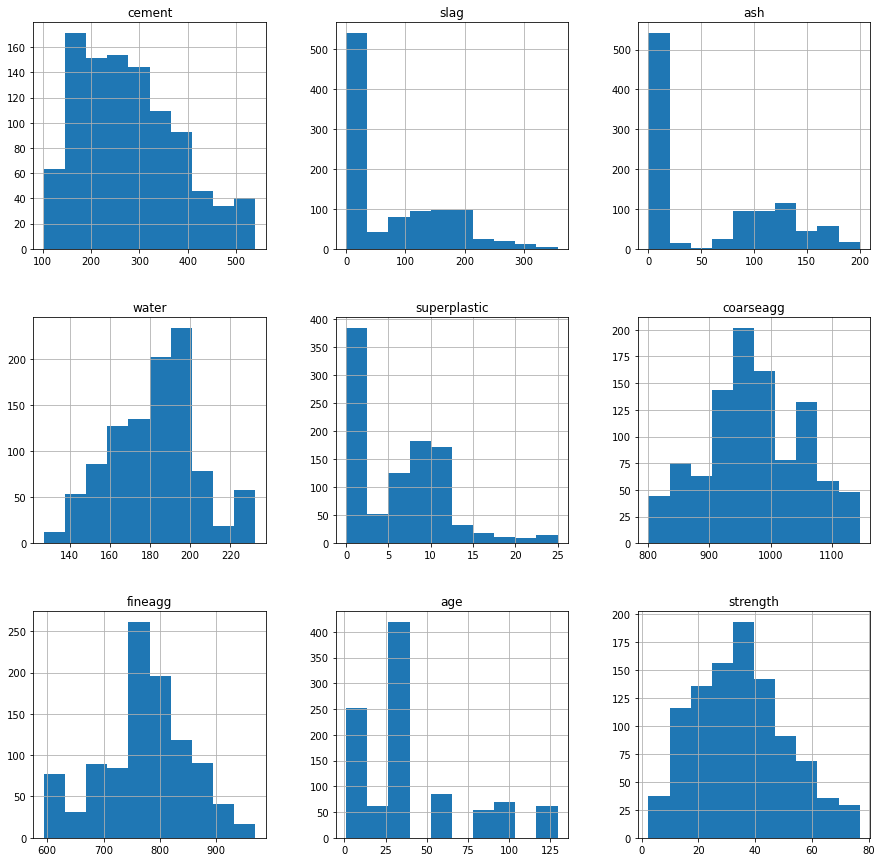

In [33]:
# Histogram 

df1.hist(figsize=(15,15))

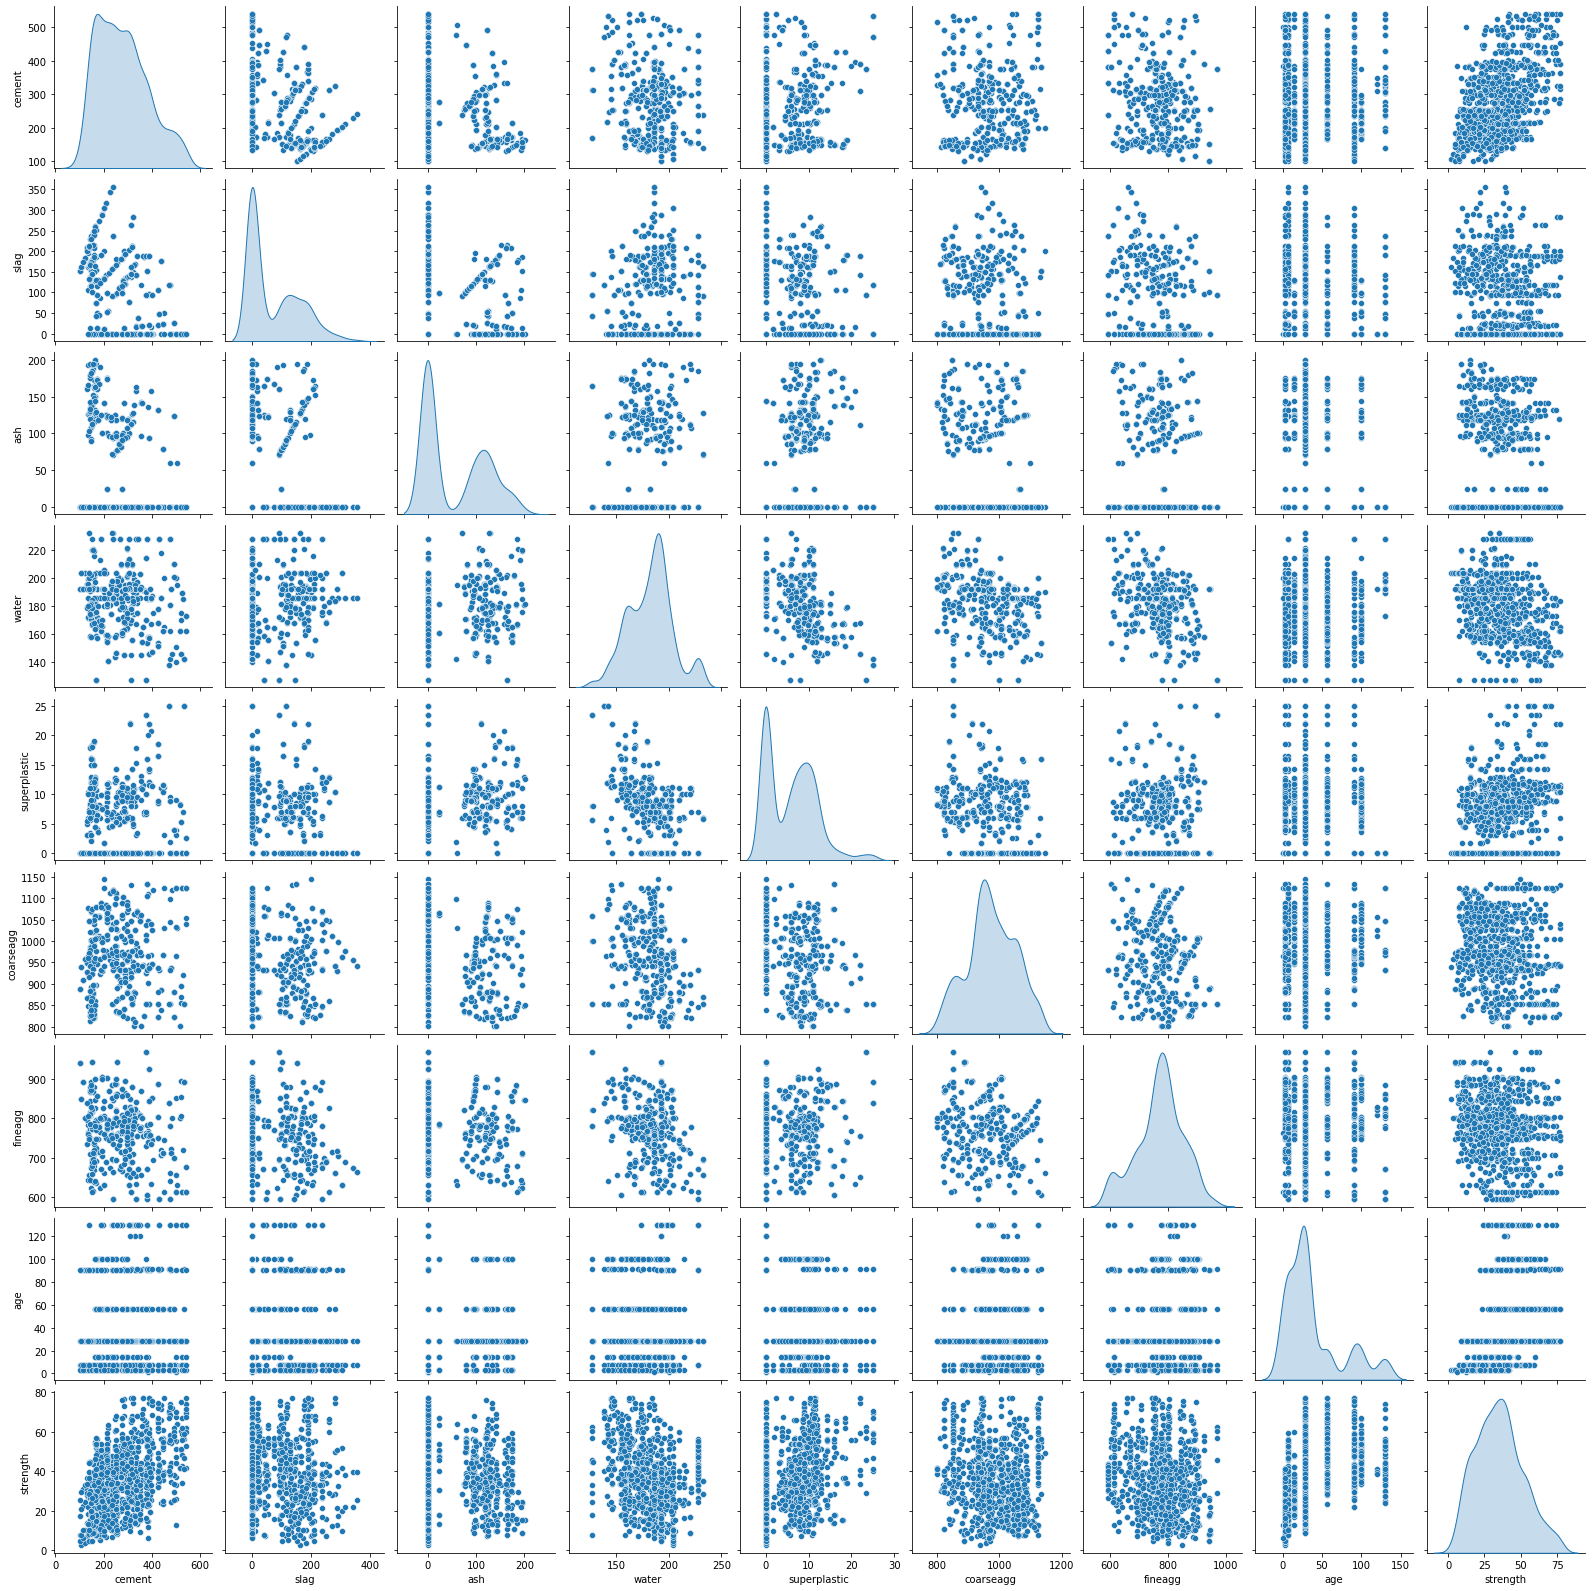

In [34]:
#bivariate
sns.pairplot(df1, diag_kind='kde')   # to plot density curve instead of histogram on the diag

### Observation

From the above plots neither of the independent attributes have a strong relationship with strength attribute. 

We can see that none of the attributes are a good predictors of the strength attribute. There is a no linear relationship between them.

So, we will not use Linear model.

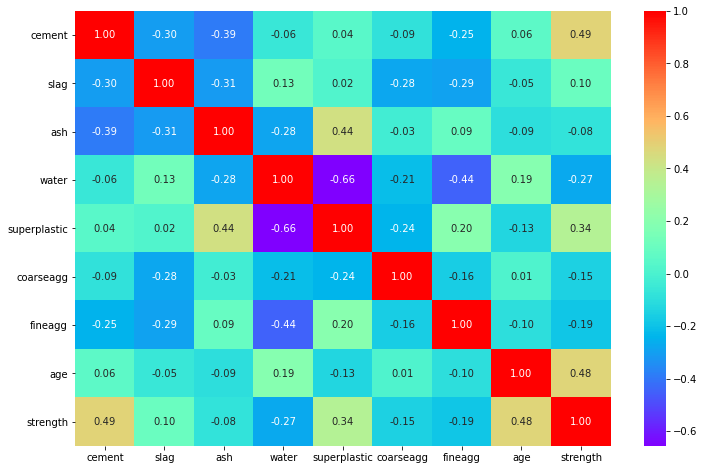

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(df1.corr(),annot=True,fmt='.2f',cmap='rainbow', ) #heatmap
plt.show()

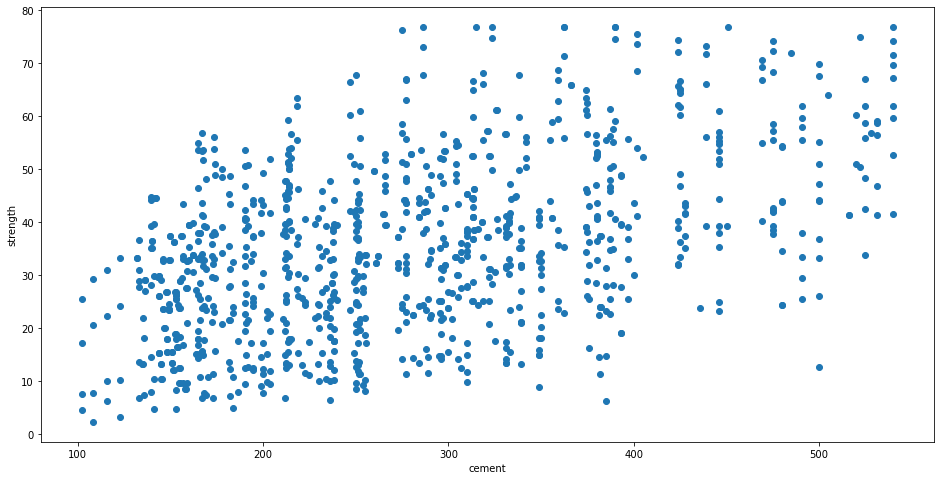

In [36]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1['cement'],df1['strength'])  # scatter plot
ax.set_xlabel('cement')
ax.set_ylabel('strength')
plt.show()

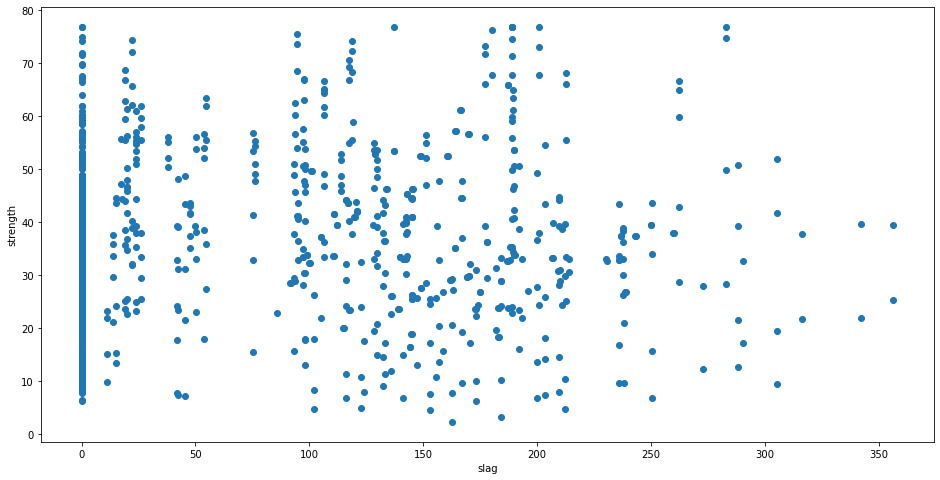

In [37]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1['slag'],df1['strength'])  # scatter plot
ax.set_xlabel('slag')
ax.set_ylabel('strength')
plt.show()

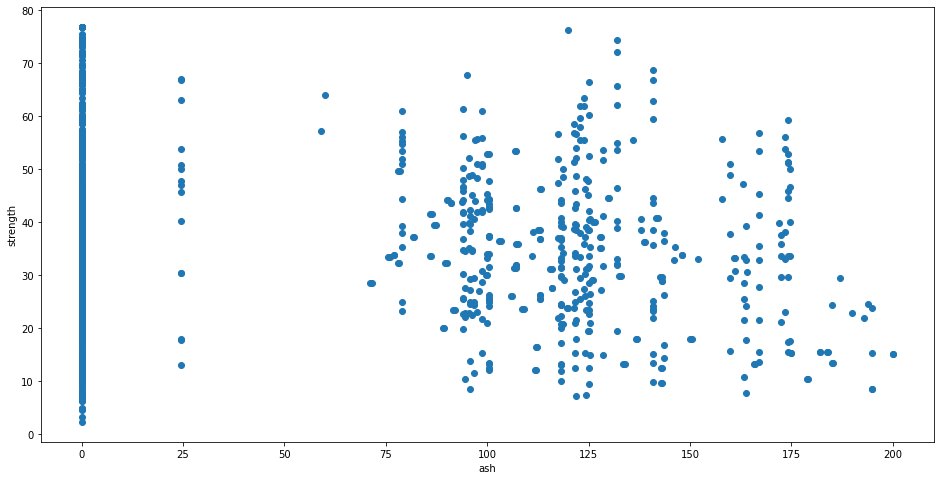

In [38]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1['ash'],df1['strength'])  # scatter plot
ax.set_xlabel('ash')
ax.set_ylabel('strength')
plt.show()

Text(0, 0.5, 'strength')

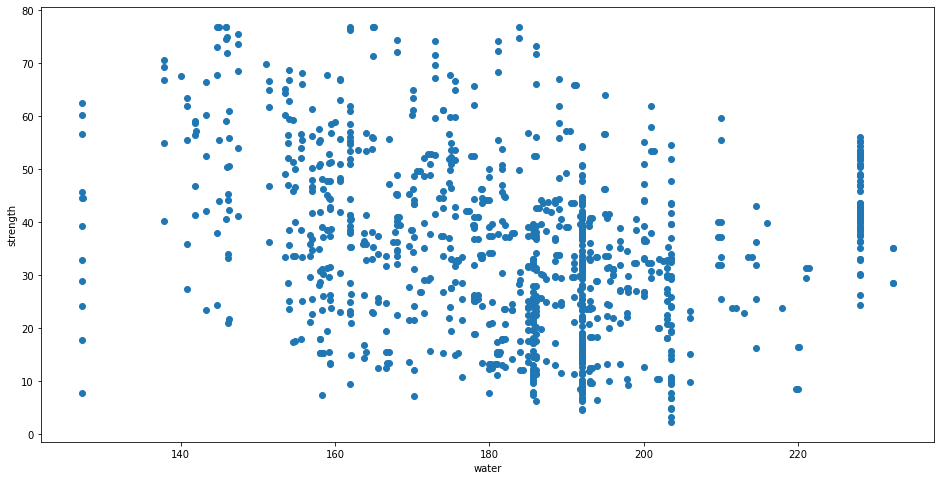

In [39]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1['water'],df1['strength'])  # scatter plot
ax.set_xlabel('water')
ax.set_ylabel('strength')

Text(0, 0.5, 'strength')

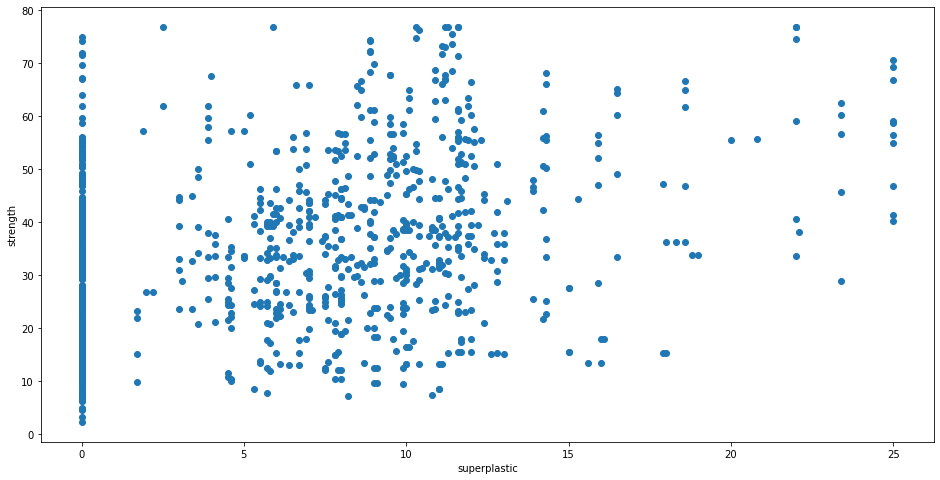

In [40]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1['superplastic'],df1['strength'])  # scatter plot
ax.set_xlabel('superplastic')
ax.set_ylabel('strength')

Text(0, 0.5, 'strength')

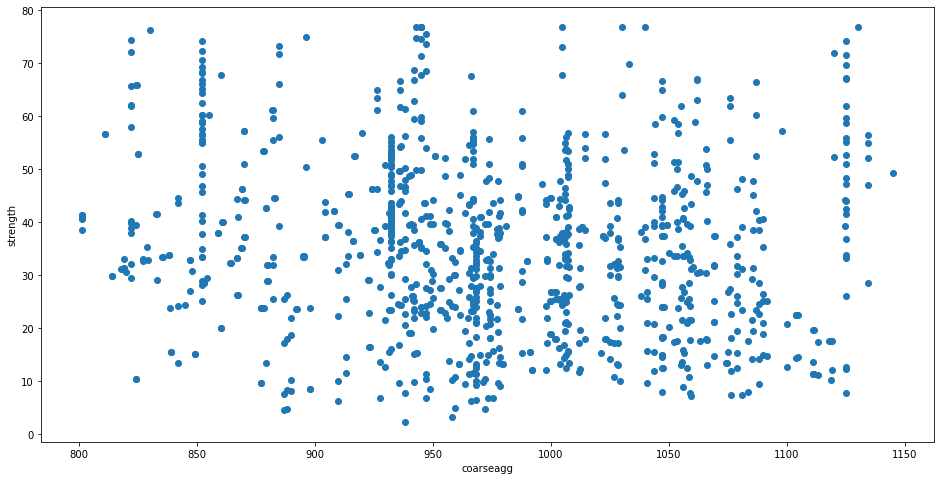

In [41]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1['coarseagg'],df1['strength'])  # scatter plot
ax.set_xlabel('coarseagg')
ax.set_ylabel('strength')

Text(0, 0.5, 'strength')

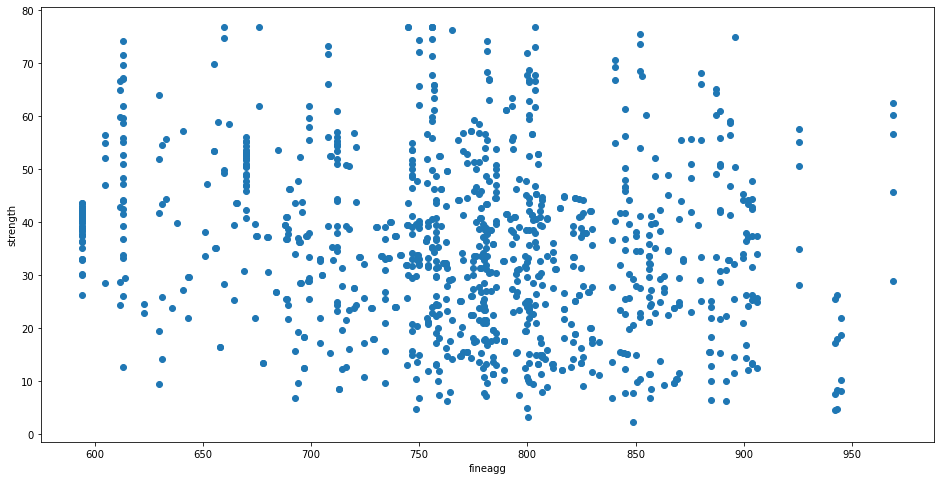

In [42]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1['fineagg'],df1['strength'])  # scatter plot
ax.set_xlabel('fineagg')
ax.set_ylabel('strength')

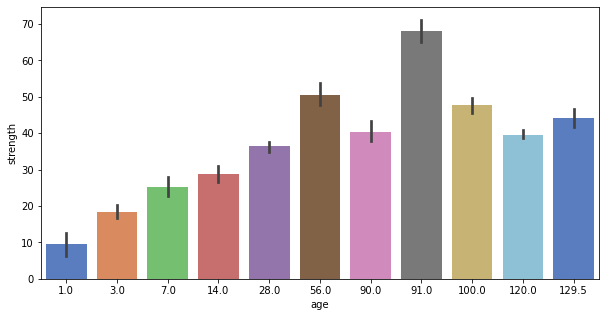

In [43]:
plt.figure(figsize=(10,5))  # setting the figure size
ax = sns.barplot(x='age', y='strength', data=df1, palette='muted')  # barplot

## Feature Engineering Techniques

In [45]:
df1['water:cement'] = df1['water']/df1['cement'] #wate to cement ratio to find correlation with strength
df1

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength,water:cement
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28.0,29.89,1.440198
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14.0,23.51,0.937241
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28.0,29.22,0.749600
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28.0,45.85,0.857143
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28.0,18.29,1.248708
...,...,...,...,...,...,...,...,...,...,...
1025,135.0,0.0,166.0,180.0,10.0,961.0,805.0,28.0,13.29,1.333333
1026,531.3,0.0,0.0,141.8,25.0,852.1,893.7,3.0,41.30,0.266893
1027,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28,0.649783
1028,342.0,38.0,0.0,228.0,0.0,932.0,670.0,129.5,55.06,0.666667


Text(0, 0.5, 'strength')

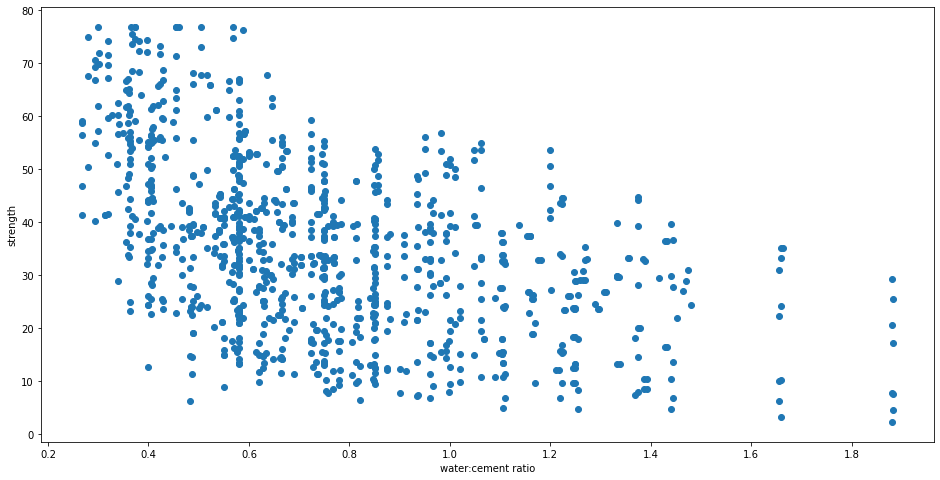

In [46]:
fig, ax = plt.subplots(figsize=(16,8))   # setting the figure size of the plot
ax.scatter(df1['water:cement'],df1['strength'])  # scatter plot
ax.set_xlabel('water:cement ratio')
ax.set_ylabel('strength')

In [44]:
#Scaling the data using z score

df_scaled = df1.apply(zscore)

df_scaled = pd.DataFrame(df_scaled, columns= df1.columns)

In [45]:
df_scaled.head()

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,-1.316792,1.625450,-0.865375,1.013480,-1.045420,-0.033232,-0.300903,-0.281105,-0.329155
1,-1.052152,-0.346513,1.071486,-1.123827,0.842159,1.372475,0.295376,-0.671679,-0.722686
2,-0.274530,-0.836600,0.625836,0.252182,-0.084153,-0.225388,1.107915,-0.281105,-0.370482
3,-0.121115,0.487332,-0.865375,2.171975,-1.045420,-0.546508,-1.282201,-0.281105,0.655290
4,-1.187348,1.293305,-0.865375,0.531167,0.545040,0.941736,-0.948435,-0.281105,-1.044666


Age and Superplastic columns are now scaled

In [46]:
#Splitting the independent variable and Dependent Variable

X = df_scaled.iloc[:,0:8]
y = df_scaled.iloc[:,8]

In [47]:
#Splitting the dataset into Train and Test

X_Train, X_Test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

## Decision Tree Regression

In [48]:
dt = DecisionTreeRegressor()
dt.fit(X_Train,y_train)


DecisionTreeRegressor()

In [49]:

#Listing down important features as stated by Decision Tree 

print('Important Feature: \n', pd.DataFrame(dt.feature_importances_,columns = ['Important'], index = X_Train.columns))

Important Feature: 
               Important
cement         0.354152
slag           0.064987
ash            0.029413
water          0.121879
superplastic   0.037612
coarseagg      0.031193
fineagg        0.036887
age            0.323879


### Observation

Cement, Age, Water are importatnt features for the model.

Ash, Coarseagg, fineagg, superplastic and slag are the less significant variable.These will impact less to the strength attribute.

In [50]:
y_pred = dt.predict(X_Test)

#Performance Evaluation

print('Performance on Training Data:', dt.score(X_Train,y_train))
print('Performance on Testing Data:', dt.score(X_Test,y_test))

acc_DT = metrics.r2_score(y_test,y_pred)
print('Model Accuracy DT:',acc_DT)
print('MSE:', metrics.mean_squared_error(y_test,y_pred))

Performance on Training Data: 0.9956298653654799
Performance on Testing Data: 0.7940001748015525
Model Accuracy DT: 0.7940001748015525
MSE: 0.18212756705471633


#### Model might be overfitting on Training Data as accuracy is 99% and the same drops to 75% while predicting in test data

In [51]:
#Store the accuracy results for each model in a dataframe for final comparison
results_model = pd.DataFrame({'Method':['Decision Tree'], 'accuracy': acc_DT},index={'1'})
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794


## Decision Tree Regression with Kfold 

In [52]:
#K Fold Cross Validation

folds = 10
seed = 77

kfold = KFold(n_splits=folds, random_state=seed,shuffle=True)
results1 = cross_val_score(dt,X,y,cv = kfold)
accuracy = np.mean(abs(results1))

print('Average Accuracy:', accuracy)
print('Standard Deviation:', results1.std())

Average Accuracy: 0.8349050791499696
Standard Deviation: 0.04386620713832637


In [53]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Decision Tree k fold'], 'accuracy': [accuracy]},index={'2'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905


## Decision Tree Regression after dropping some least significant columns

In [54]:
#Creating a copy of the data

df2 = df_scaled.copy()

In [55]:
X = df2.drop(['strength','ash','coarseagg','fineagg'] , axis=1)
y = df2['strength']

In [56]:
#Splitting the dataset into Train and Test

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [57]:
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)

DecisionTreeRegressor()

In [58]:
#printing the feature importance

print('Feature importances: \n',pd.DataFrame(dt.feature_importances_,columns=['Important'],index=X_train.columns))

Feature importances: 
               Important
cement         0.383738
slag           0.089332
water          0.141091
superplastic   0.058714
age            0.327124


In [59]:
y_pred = dt.predict(X_test)

# performance on train data
print('Performance on training data:',dt.score(X_train,y_train))
# performance on test data
print('Performance on testing data:',dt.score(X_test,y_test))
#Evaluate the model using accuracy
acc_DT=metrics.r2_score(y_test, y_pred)
print('Accuracy DT: ',acc_DT)

Performance on training data: 0.9947496490424896
Performance on testing data: 0.7626110532355481
Accuracy DT:  0.7626110532355481


####  The Model is still Over fitting

In [60]:
#store the results

tempResultsDf = pd.DataFrame({'Method':['Decision Tree2'], 'accuracy': [acc_DT]},index={'3'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611


##  Random Forest Regression

In [61]:
#splitting independent and dependent variables
X=df_scaled.iloc[:,0:8]
y = df_scaled.iloc[:,8]

# Split X and y into training and test set in 70:30 ratio

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [62]:
model=RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [63]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using RFR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using RFR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_RFR=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_RFR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using RFR: 0.9837971085099402
Performance on testing data using RFR: 0.9002734775435014
Accuracy DT:  0.9002734775435014
MSE:  0.08816972969920024


#### Testing accuracy improved a bit

In [64]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor'], 'accuracy': [acc_RFR]},index={'4'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273


## Random Forest Regression with KFold

In [65]:
num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True)
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9099980508052858
Standard Deviation:  0.017441510880694507


In [66]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Random Forest Regressor k fold'], 'accuracy': [accuracy]},index={'5'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998


## Gradient Boosting Regression

In [67]:
#Gradient Boosting Regressor

model = GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [68]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_GBR=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_GBR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9465800794156118
Performance on testing data using GBR: 0.8969096714470152
Accuracy DT:  0.8969096714470152
MSE:  0.09114372164218701


In [69]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor'], 'accuracy': [acc_GBR]},index={'6'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998
6,Gradient Boost Regressor,0.896910


## Gradient Boosting Regression with KFold

In [70]:
#Applying K-Fold

folds = 10
seed = 77

kfold = KFold(n_splits=folds, random_state=seed,shuffle=True)
results1 = cross_val_score(dt,X,y,cv = kfold)
accuracy = np.mean(abs(results1))

print('Average Accuracy:', accuracy)
print('Standard Deviation:', results1.std())

Average Accuracy: 0.8376673808383448
Standard Deviation: 0.028308504553904837


In [71]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Gradient Boost Regressor k fold'], 'accuracy': [accuracy]},index={'7'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998
6,Gradient Boost Regressor,0.896910
7,Gradient Boost Regressor k fold,0.837667


## Bagging Regression

In [72]:
#Bagging Regressor

model=BaggingRegressor()
model.fit(X_train, y_train)

BaggingRegressor()

In [73]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_BR=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_BR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9763766031573711
Performance on testing data using GBR: 0.8689956276384667
Accuracy DT:  0.8689956276384667
MSE:  0.11582295076586309


In [74]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor'], 'accuracy': [acc_BR]},index={'8'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998
6,Gradient Boost Regressor,0.896910
7,Gradient Boost Regressor k fold,0.837667
8,Bagging Regressor,0.868996


## Bagging Regression with KFold

In [75]:
#Applying KFold 

num_folds = 10
seed = 77
kfold = KFold(n_splits=num_folds, random_state=seed,shuffle=True )
results1 = cross_val_score(model,X, y, cv=kfold)
accuracy=np.mean(abs(results1))
print('Average accuracy: ',accuracy)
print('Standard Deviation: ',results1.std())

Average accuracy:  0.9003753186632878
Standard Deviation:  0.020774413675132903


In [76]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Bagging Regressor k fold'], 'accuracy': [accuracy]},index={'9'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998
6,Gradient Boost Regressor,0.896910
7,Gradient Boost Regressor k fold,0.837667
8,Bagging Regressor,0.868996
9,Bagging Regressor k fold,0.900375


## Ensemble Model

In [77]:
## Ensemeble KNN Regressor, SVR, LR

from sklearn import svm

LR=LinearRegression()
KN=KNeighborsRegressor(n_neighbors=3)
SVM=svm.SVR(kernel='linear')

In [78]:
e=VotingRegressor(estimators=[('LR',LR),('KN',KN),('SVM',SVM)])
e.fit(X_train, y_train)

VotingRegressor(estimators=[('LR', LinearRegression()),
                            ('KN', KNeighborsRegressor(n_neighbors=3)),
                            ('SVM', SVR(kernel='linear'))])

In [79]:
y_pred = e.predict(X_test)

# performance on train data
print('Performance on training data using ensemble:',e.score(X_train,y_train))
# performance on test data
print('Performance on testing data using ensemble:',e.score(X_test,y_test))
#Evaluate the model using accuracy
acc_E=metrics.r2_score(y_test, y_pred)

print('Accuracy ensemble: ',acc_E)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using ensemble: 0.8241607067372827
Performance on testing data using ensemble: 0.7172691320504022
Accuracy ensemble:  0.7172691320504022
MSE:  0.2499666446868256


In [80]:
#Store the accuracy results for each model in a dataframe for final comparison
tempResultsDf = pd.DataFrame({'Method':['Ensemble'], 'accuracy': [acc_E]},index={'10'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998
6,Gradient Boost Regressor,0.896910
7,Gradient Boost Regressor k fold,0.837667
8,Bagging Regressor,0.868996
9,Bagging Regressor k fold,0.900375
10,Ensemble,0.717269


## XGBoost Regression

In [81]:
from xgboost import XGBRegressor


model=XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using GBR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using GBR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_XG=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_XG)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))

Performance on training data using GBR: 0.9952210567731898
Performance on testing data using GBR: 0.9203232784854137
Accuracy DT:  0.9203232784854137
MSE:  0.07044339686389757


#### This model performs well with both test and train data. This is very slightly overfit. It can be further adjusted

In [83]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['XG Boost Regressor'], 'accuracy': [acc_XG]},index={'11'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998
6,Gradient Boost Regressor,0.896910
7,Gradient Boost Regressor k fold,0.837667
8,Bagging Regressor,0.868996
9,Bagging Regressor k fold,0.900375
10,Ensemble,0.717269


## Simple Linear regression

In [84]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# performance on train data
print('Performance on training data using LR:',model.score(X_train,y_train))
# performance on test data
print('Performance on testing data using LR:',model.score(X_test,y_test))
#Evaluate the model using accuracy
acc_LR=metrics.r2_score(y_test, y_pred)

print('Accuracy DT: ',acc_LR)
print('MSE: ',metrics.mean_squared_error(y_test, y_pred))


Performance on training data using LR: 0.7351817182772615
Performance on testing data using LR: 0.6773099541878451
Accuracy DT:  0.6773099541878451
MSE:  0.28529515935232763


In [85]:
#Store the accuracy results for each model in a dataframe for final comparison

tempResultsDf = pd.DataFrame({'Method':['Linear Regression'], 'accuracy': [acc_LR]},index={'12'})
results_model = pd.concat([results_model, tempResultsDf])
results_model = results_model[['Method', 'accuracy']]
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998
6,Gradient Boost Regressor,0.896910
7,Gradient Boost Regressor k fold,0.837667
8,Bagging Regressor,0.868996
9,Bagging Regressor k fold,0.900375
10,Ensemble,0.717269


## Using Grid Search in Random Forest regressor

In [86]:
from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [87]:
# build a regressor
clf = RandomForestRegressor(n_estimators=50)

In [88]:
# use a full grid over all parameters
param_grid = {"max_depth": [3, None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [True, False]}

In [89]:
# run grid search
grid_search = GridSearchCV(clf, param_grid=param_grid)
start = time()
grid_search.fit(X, y)

GridSearchCV(estimator=RandomForestRegressor(n_estimators=50),
             param_grid={'bootstrap': [True, False], 'max_depth': [3, None],
                         'max_features': [1, 3, 10],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [2, 3, 10]})

In [90]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3}

In [91]:
grid_search.cv_results_['mean_test_score']

array([0.44306203, 0.4546316 , 0.4565734 , 0.43621369, 0.44495796,
       0.44889622, 0.43938924, 0.44858282, 0.4369439 , 0.63722549,
       0.63679559, 0.63552773, 0.62868386, 0.64430783, 0.63582835,
       0.62621694, 0.6312588 , 0.63295606,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan, 0.84081219, 0.83945349, 0.78327637,
       0.76735742, 0.76313372, 0.75348174, 0.65937556, 0.65935114,
       0.64749851, 0.90011447, 0.89500268, 0.87256077, 0.87391416,
       0.87093629, 0.86563128, 0.81251855, 0.8100685 , 0.80653231,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.46187544,
       0.45409337, 0.46003928, 0.45634098, 0.45514171, 0.45270814,
       0.45161438, 0.45346461, 0.44137902, 0.63461548, 0.63224583,
       0.63519494, 0.63769021, 0.63073416, 0.63982241, 0.64094517,
       0.63773893, 0.63769081,        nan,        nan,        

In [92]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=False, max_features=3, min_samples_split=3,
                      n_estimators=50)

## Dataframe of all model accuracies

In [93]:
results_model

,Method,accuracy
1,Decision Tree,0.794000
2,Decision Tree k fold,0.834905
3,Decision Tree2,0.762611
4,Random Forest Regressor,0.900273
5,Random Forest Regressor k fold,0.909998
6,Gradient Boost Regressor,0.896910
7,Gradient Boost Regressor k fold,0.837667
8,Bagging Regressor,0.868996
9,Bagging Regressor k fold,0.900375
10,Ensemble,0.717269


#### XG Boost Regression is the best model for this dataset. It performs well in both training and testing tests.